<a href="https://colab.research.google.com/github/DeaTHkinG02/diff_eq/blob/main/phase_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import Matrix,Symbol,Poly,roots,exp,sin,cos,simplify,I,log
from numpy import linspace,meshgrid
import matplotlib.pyplot as plt
t=Symbol('t')
l=Symbol('lambda')

class Difsys():



    def __init__(self,mat):

        self.mat=mat
        self.dim=len(self.mat)
        self.r=self.matrix().rank()


    def matrix(self):
        return Matrix(self.mat)


    def characteristic(self,poly='poly'):
        m_ld=[[0 for i in range(self.dim)] for j in range(self.dim)]
        for i in range(self.dim):
            m_ld[i][i]=l

        if poly=='poly':
            return (self.matrix()-Matrix(m_ld)).det()
        if poly=='coeffs':
            return Poly((self.matrix()-Matrix(m_ld)).det()).all_coeffs()
        if poly=='roots':
            try:
                return list(roots((self.matrix()-Matrix(m_ld)).det()).keys())
            except:
                return 'Too hard('

    def hurwitz(self):
        coeffs=self.characteristic('coeffs')
        n=len(coeffs)-1
        h=[[0 for i in range(n)] for j in range(n)]
        for i in range(n):
            for j in range(n):
                if 2*(j)+1-i<=n and 2*(j)+1-i >=0:
                    h[i][j]=-coeffs[2*(j)+1-i]
                else:
                    h[i][j]=0
        return Matrix(h)


    def phase_plane(self):
        if self.dim >3:
            return 'Are you crazy?! we live in 3D!!!'
        if self.dim==2:
            xx,yy=meshgrid(linspace(-10,10),linspace(-10,10))
            dxx=self.mat[0][0]*xx+self.mat[0][1]*yy
            dyy=self.mat[1][0]*xx+self.mat[1][1]*yy
            fig,ax=plt.subplots()
            ax.streamplot(xx,yy,dxx,dyy,arrowsize= 1)
            ax.set_facecolor('black')


    def FSS(self):
        return self.matrix().eigenvects()



In [2]:
s=Difsys([[0,1],[-2,1]])

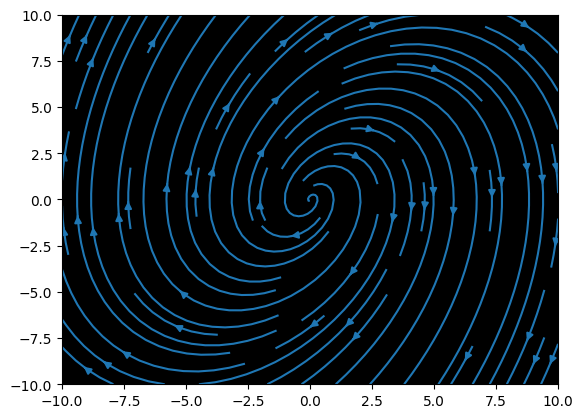

In [3]:
s.phase_plane()